LOGISTIC REGRESSION AKA SIGMOID FUNCTION IS THE WAY TO BINARY PREDICT VALUE

1. generate data

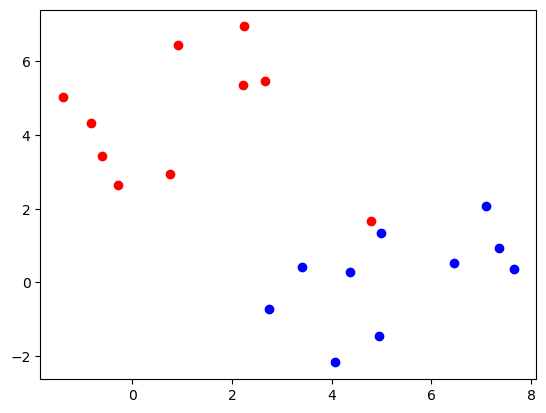

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_sample = 10
X_red = np.random.normal(0.0, 1.5, size=(n_sample, 2)) + np.array([1, 5])
X_blue = np.random.normal(0.0, 1.5, size=(n_sample, 2)) + np.array([5, 1])
plt.plot(X_red[:,0], X_red[:,1], 'ro')
plt.plot(X_blue[:,0], X_blue[:,1], 'bo')

X = np.concatenate((X_red, X_blue))
y = [0]*n_sample + [1]*n_sample

In [2]:
y

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

2. buid model

In [3]:
from sklearn.linear_model import LogisticRegression #import logistic regression 

logistic = LogisticRegression()
logistic.fit(X,y)



LogisticRegression()

In [4]:
logistic.coef_ # show the coefficient of logistic regression b1 bx 

array([[ 0.60925725, -1.06070772]])

In [5]:
logistic.intercept_ # show the intecept of logistic regression (b0)

array([-0.22678624])

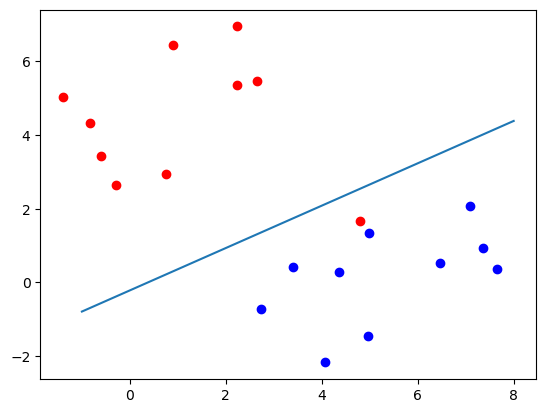

In [6]:
# Vẽ lại các điểm huấn luyện
plt.plot(X_red[:,0], X_red[:,1], 'ro')
plt.plot(X_blue[:,0], X_blue[:,1], 'bo')

# Vẽ hàm mô hình
w1 = logistic.coef_[0][0]
w2 = logistic.coef_[0][1]
bias = logistic.intercept_[0]
def cal_x2 (x1):
  return (-w1*x1-bias) / w2

plt.plot([-1, 8], [cal_x2(-1), cal_x2(8)])

In [7]:
y_pred = logistic.predict(X)

In [8]:
from sklearn.metrics import accuracy_score

print("Accuracy", accuracy_score(y_pred, y))

Accuracy 0.95


In case of non linear data 

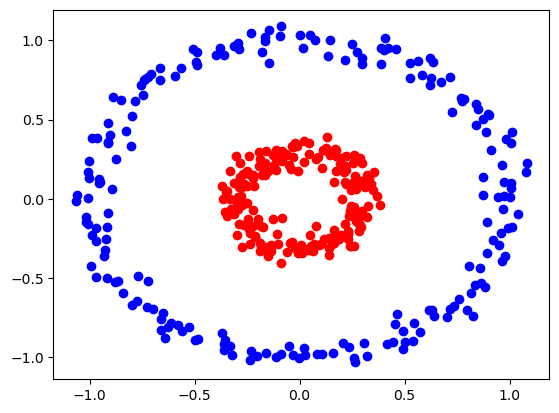

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=.3, noise =.05)

#Visualize data

plt.plot(X[y==0,0], X[y==0,1], "bo")
plt.plot(X[y==1,0], X[y==1,1], "ro")

In [12]:
logistic = LogisticRegression()
logistic.fit(X,y)

LogisticRegression()

In [14]:
#Visualization with non linear data

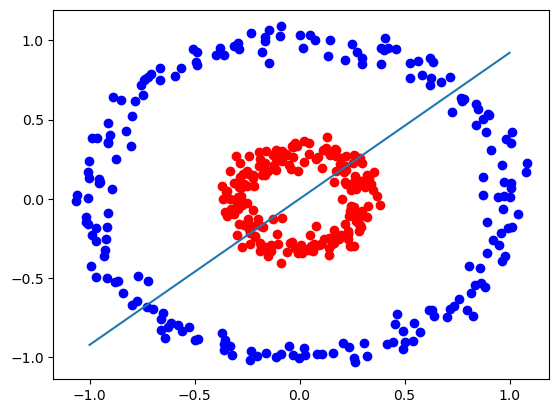

In [15]:
# Visualize data
plt.plot(X[y==0,0],X[y==0,1], 'bo')
plt.plot(X[y==1,0],X[y==1,1], 'ro')

# Vẽ hàm mô hình
w1 = logistic.coef_[0][0]
w2 = logistic.coef_[0][1]
bias = logistic.intercept_[0]
def cal_x2 (x1):
  return (-w1*x1-bias) / w2

plt.plot([-1, 1], [cal_x2(-1), cal_x2(1)])

In [16]:
from sklearn.metrics import accuracy_score
y_pred = logistic.predict(X)
print('Accuracy: ', accuracy_score(y_pred, y))

Accuracy:  0.5025


In [17]:
X_new = np.hstack((X, (X[:,0]**2).reshape(X.shape[0],1)))
X_new = np.hstack((X_new, (X[:,1]**2).reshape(X.shape[0],1)))
X_new = np.hstack((X_new, (X[:,0]*X[:,1]).reshape(X.shape[0],1)))

X_new.shape
# 5 features: x1, x2, x1^2, x2^2, x1*x2

(400, 5)

In [18]:
logistic = LogisticRegression()
logistic.fit(X_new, y)

LogisticRegression()

In [19]:
y_pred = logistic.predict(X_new)
print('Accuracy: ', accuracy_score(y_pred, y))

Accuracy:  1.0


In [20]:
#Use neutral network for non-linear data

In [21]:
from sklearn.neural_network import MLPClassifier

params = { 'hidden_layer_sizes' : [10],
    'activation' : 'logistic',
    'solver' : 'adam',
    'alpha' : 0.0,
    'batch_size' : 100,
    'random_state' : 0,
    'tol' : 0.0001,
    'nesterovs_momentum' : False,
    'learning_rate' : 'constant',
    'learning_rate_init' : 0.01,
    'max_iter' : 100000,
    'shuffle' : True,
    'n_iter_no_change' : 50,
    'verbose' : False }

net = MLPClassifier(**params)

In [22]:
net.fit(X, y)

MLPClassifier(activation='logistic', alpha=0.0, batch_size=100,
              hidden_layer_sizes=[10], learning_rate_init=0.01, max_iter=100000,
              n_iter_no_change=50, nesterovs_momentum=False, random_state=0)

In [23]:
net.score(X, y)

1.0

In [24]:
net.intercepts_

[array([ 1.17115177, -3.41427483, -4.89152561,  0.86572389, -4.68042104,
         4.48276202, -4.06569855,  4.89938571, -2.27974333, -3.99501127]),
 array([-1.00495639])]

In [25]:
net.coefs_

[array([[ 0.39878365,  2.75864723,  6.0601249 ,  0.50495887,  5.77168345,
         -1.94363632, -8.46196585,  9.12843079,  3.15434701, -8.36233732],
        [ 0.12225194, -6.31998215,  8.17687041,  0.17989941, -7.55501781,
         -9.19234928,  0.42442715,  3.70507657, -3.58836318,  0.92340395]]),
 array([[-1.25787753],
        [-1.94500015],
        [-6.01673994],
        [-1.03647215],
        [-7.67093728],
        [ 4.62318141],
        [-3.77785324],
        [ 4.48637393],
        [-1.44114202],
        [-3.52439876]])]

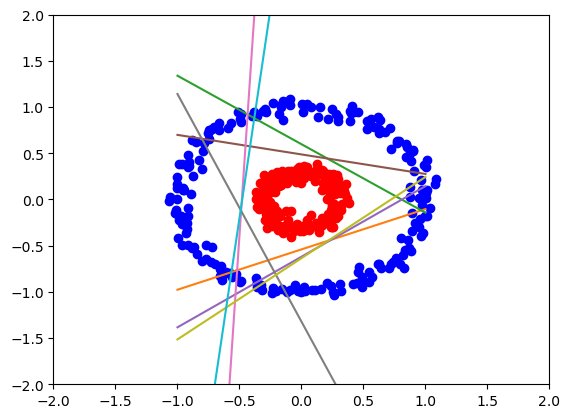

In [26]:
# Visualize các nốt trong mạng Neural Network sau khi đã
# học được từ dữ liệu
plt.ylim(-2, 2)
plt.xlim(-2, 2)
plt.plot(X[y==0,0], X[y==0,1], 'bo')
plt.plot(X[y==1,0], X[y==1,1], 'ro')
# layer muốn visualize
layer = 0
for nodeID in range(len(net.intercepts_[0])):
  w1 = net.coefs_[layer][0][nodeID]
  w2 = net.coefs_[layer][1][nodeID]
  b = net.intercepts_[layer][nodeID]

  plt.plot([-1, 1], [-w1/w2*(-1)-b/w2, -w1/w2*(1)-b/w2])